### 06 XGBoost(eXtra Gradient Boost)
#### (1) XGBoost 개요
1. 분류와 회귀 있어 일반적으로 다른 머신러닝보다 뛰어난 예측 성능
2. GBM에 기반하고 있지만 **병렬 수행** 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장 (랜덤포레스트보다 빠르지는 않음)
3. **과적합 규제 (regularization)** : 표준 GBM과 달리 자체에 과적합 규제 기능으로 좀더 강한 내구성을 가질 수 있음
4. **Tree pruning**으로 더이상 긍정 이득이 없는 분할을 가지치기해서 분할수를 줄이는 추가적인 장점을 가지고 있음
5. 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음
 1. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 **조기 중단 기능**이 있음
6. 결손값을 자체 처리할 수 있는 기능을 가지고 있음
- xgboost 패키지 내에는 XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용(Wrapper class) XGBoost가 함께 존재
 - 래퍼 클래스인 XGBClassifier와 XGBRegressor를 이용하면 fit()과 predict()같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티 활용 가능
 - 1) 파이썬 래퍼 XGBoost 모듈 : 초기 독자적인 XGBoost 프레임워크 기반의 XGBoost. 고유의 API와 하이퍼파라미터 이용
 - 2) 사이킷런 래퍼 XGBoost 모듈 : 사이킷런과 연동 가능
 
#### (2) XGBoost 설치하기
#### (3) 파이썬 래퍼 XGBoost 하이퍼파라미터
1. **일반 파라미터** : 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터, 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
 1. booster : gbtee(tree based model) 또는 gblinear(linear model) 선택. 디폴트는 gbtree
 2. silent : 디폴트는 0, 출력 메시지를 나타내고 싶지 않을 경우 1
 3. nthread : CPU의 실행 스레드 개수를 조정, 디폴트틑 CPU의 전체 스레드를 다 사용. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경
### 
2. **부스터 파라미터** : 트리 최적화, 부스팅, regulrization 등과 관련 파라미터 등을 지칭 (대부분의 하이퍼파라미터 포함)
 1. eta [default=0.3, alias: learning_rate] : GBM의 학습률과 같은 파라미터. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1. 보통은 0.01~0.2 사이의 값 선호
 2. num_boost_rounds : GBM의 n_estimators와 같은 파라미터
 3. min_child_weight [default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. 클수록 분할을 자제하며 과적합을 조절하기 위해 사용됨
 4. gamma [default=0, alias:min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노트를 분리, 값이 클수록 과적합 감소 효과
 5. max_depth [default=6] : 트리 기반 알고리즘의 max_depth와 같음. 보통은 3~10 사이의 값을 적용.
 6. sub_sample [default=1] : GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 샘플링하는 비율. 일반적으로 0.5~1 사이의 값 사용
 7. colsample_bytree [default=1] : GBM의 max_features와 유사. 트리 생성에 필요한 피처를 임의로 샘플링 하는 데 사용되며 많은 피처가 있는 경우 과적합을 조정하는 데 적용
 8. lambda [default=1, alias:reg_lambda] : L2 regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과
 9. scale_pos_weight [default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터
###    
3. **학습 태스크 파라미터** : 학습 수행 시의 객체함수, 평가를 위한 지표 등을 설정
 1. objective : 최소값을 가져야할 손실함수 정의. 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐
 2. binary:logistic: 이진 분류일 때 적용
 3. multi:softmax: 다중 분류일 때 적용. 레이블 클래스의 개수인 num_class 파라미터를 지정해야함
 4. multi:softprob: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
 5. eval_metric : 검증에 사용되는 함수 정의. 기본값을 회귀인 경우 rmse, 분류인 경우엔 error. 그외 mae/logloss/merror/mlogloss/auc

- 뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적음
- 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분


#### (+) 과적합 문제가 심각할 때 적용을 고려하는 것
- eta 값을 낮춤 (0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 함
-  max_depth 값을 낮춤
-  min_child_weight 값을 높임
-  gamma 값을 높임
- subsample과 colsample_bytree를 조정함

#### (+) 조기중단기능 (early stopping)
- n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선
- ex. 조기 중단 파라미터 값을 50으로 설정시, 부스팅을 반복하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더이상 부스팅을 진행하지 않고 종료함

In [2]:
# XGBoost 버전확인
import xgboost
print(xgboost.__version__)

1.5.2


#### (4) 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [4]:
import xgboost as xgb
from xgboost import plot_importance # 피처 중요도 시각화 모듈
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
# 레이블값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())
# 1값이 양성, 0값이 악성

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


1. 파이썬 래퍼 XGBoost는 학습용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성
 1. DMtrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
 2. DMatrix의 주요 입력 파라미터는 data (피처 데이터 세트)와 label (분류의 경우에는 레이블 데이터 세트, 회귀의 경우에는 숫자형인 종속값 데이터 세트)
 3. 판다스의 DataFrame으로 데이터 인터페이스를 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차 변환한 뒤에 이를 이용해 DMatrix 변환을 적용
####  
2. 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train()함수에 파라미터로 전달 (cf. 사이킷런은 estimator의 생성자를 하이퍼파라미터로 전달)
####  
3. 조기 중단은 xgboost의 train()함수에 early_stopping_rounds 파라미터를 입력하여 설정
 1. 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야함
 2. Xgboost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류 측정. 분류인 경우 주로 'error', 'logloss'를 적용


In [8]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
# XGBoost의 하이퍼파라미터 : 주로 딕셔너리 형태로 입력
params = { 'max_depth':3,
         'eta': 0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100}
num_rounds=400

# train 데이터 세트는 'train', evaluation(test) 데이터세트는 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

# 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소

[00:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train

[161]	train-logloss:0.00726	eval-logloss:0.08801
[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:

In [12]:
# xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
# 본 예제는 악성/양성 판단 이진 준류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직 추가

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체엔 pred에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [9]:
# get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, preds, pred_probs)

NameError: name 'pred_probs' is not defined

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

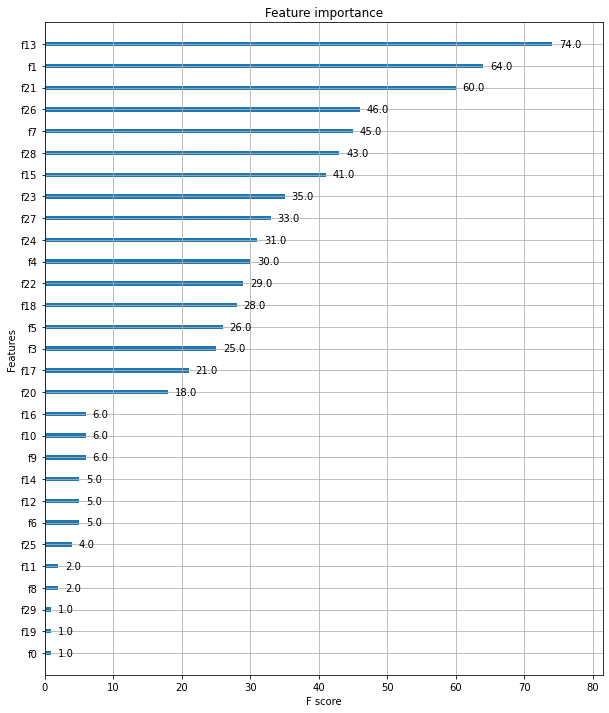

In [14]:
# xgboost 패키지에 내장된 시각화 기능 수행
# 기본 평가 지표인 f1 스코어를 기반으로 각 피처의 중요도를 막대그래프 형식으로 나타냄
# plot_importance() 호출하여 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력
# 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들로 나열함 (f0, f1, ...)

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

- 결정 트리에서 본 트리 기반 규칙 구조도 xgboost에서 to_graphviz() API를 이용하여 시각화 가능
- 파이썬 래퍼 XGBoost의 cv() API는 사이킷런의 GridSearchCV와 유사하게 데이터세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법 제공. 반환값은 DataFrame 형태
> xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=Npne, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

#### (5) 사이킷런 래퍼 XGBoost의 개요 및 적용
- 파이썬 래퍼 XGBoost의 하이퍼 파라미터 중 일부는 사이킷런 래퍼 XGBoost에서 변경됨.
 - eta -> learning_rate
 - sub_sample -> subsample
 - lambda -> reg_lambda
 - alpha -> reg_alpha
- xgboost의 n_estimators와 num_boost_round 하이퍼파라미터는 동일. 두개가 동시에 사용되면 파이썬 래퍼 XGBoost에서는 n_estimator를 무시하고 num_boost_round 파라미터를 적용, 사이킷런 래퍼 클래스에서는 n_estimator를 적용

In [15]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[00:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
# 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)

# 파이썬 래퍼 XGBoost와 동일한 평과 결과가 나옴

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [22]:
# 사이킷런 래퍼 XGBoost에서 조기 중단을 수행하기 위해 조기 중단 관련 파라미터를 fit()에 입력
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
# 성능 평가를 수행할 데이터 세트는 학습 데이터가 아니라 별도의 데이터 세트여야 함 
# 테스트 데이터 세트는 학습 시에 완전히 알려지지 않은 데이터 세트여야 하기 때문에 평가에 테스트 데이터를 사용하면 과적합할 수 있지만 해당 예제에서 데이터 크기가 작아 불가피하게 사용함

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

# n_estimators=400이지만 311번 반복한 후 학습을 완료함

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [23]:
# 조기중단으로 학습된 XGBClassifier의 예측 성능 평가
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)
# 조기 중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타냈지만, 큰 차이는 아님

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [24]:
# early_stopping_rounds를 10으로 설정하고 재 학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

- 조기 중단값을 너무 급격하게 줄이면 성능이 향상될 여지가 있음에도 불구하고 성능평가 지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음
- early_stopping_rounds=10으로 설정시 early_stopping_rounds=100일 때보다 낮음

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

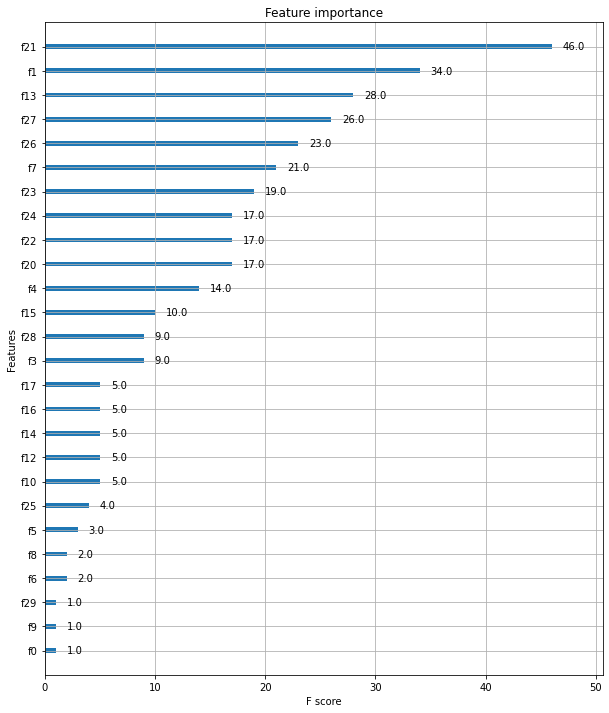

In [26]:
# plot_importance() API에 사이킷런 래퍼 클래스를 입력해도 앞서 파이썬 래퍼 클래스를 입력한 결과와 똑같이 시각화 결과를 도출함

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

### 07 LightGBM
- XGBoost대비 LightGBM의 장점
1. 더 빠른 학습과 예측 수행 시간
2. 더 작은 메모리 사용량
3. 카테고리형 피처의 자동 변환가 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)
- LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없으며 기능상의 다양성은 LightGBM이 약간 더 많음
- 단점 : 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다 (일반적으로 10,000건 이하의 데이터 세트 정도)
- 일반 GBM 계열의 트리 분할 방법과 다르게 **리프 중심 트리 분할 (Leaf Wise) 방식**을 사용 : 최대 손실 값(max delta loss)를 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨. 최대 손실값을 가지는 리프 노트를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 구현 사상
 - 기존 대부분의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형트리분할 (Level Wise) 방식을 사용 - 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문, 하지만 균형을 맞추기 위한 시간이 필요하다는 상대적인 단점이 있음


#### (1) LightGBM 설치
#### (2) LightGBM 하이퍼파라미터

- LightBGM은 Xgboost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 특성에 맞는 하이퍼 파라미터 설정이 필요 (ex. max_depth를 매우 크게 가짐)
1. 주요 파라미터
 1. num_iterations [default=100] : 반복수행하려는 트리의 개수를 지정. 크게 지정시 예측 성능이 높아질 수 있지만 과적합으로 성능이 저하될 수 있음. 사이킷런 호환 클래스에서는 n_estimators로 이름이 변경됨
 2. learning_rate [default=0.1]
 3. max_depth [default=-1] : 0보다 작은 값을 지정하면 깊이에 제한이 없음. Leafwise 기반이므로 깊이가 상대적으로 더 깊음
 4. min_data_in_leaf [default=20] : 결정 트리의 min_samples_leaf와 같은 파라미터. 사이킷런 래퍼의 경우 min_child_samples 파라미터로 이름이 변경됨. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수, 과적합 제어용 파라미터
 5. num_leaves [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수
 6. boosting [default=gbdt] : 부스팅의 트리를 생성하는 알고리즘 기술 (gbdt: 일반적인 그래디언트부스팅 결정트리, rf: 랜덤포레스트)
 7. bagging_fraction [default=1.0] : 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율로 지정. 사이킷런 래퍼에서는 subsample로 파라미터 이름이 변경됨
 8. feature_fraction [default=1.0] :  개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용됨. LightBGMClassifier에서는 colsample_bytree로 변경됨. 
 9. lambda_l2 [default=0.0] : L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음. LightBGMClassifier에서는 reg_lambda로 변경됨.
 10. lambda_l1 [default=0.0] : L1 regulation 제어를 위한 값. LightBGMClassifier에서는 reg_alpha로 변경됨.
2. Learning Task 파라미터
 1. objective : 최솟값을 가져야 할 손실함수를 정의. 어플리케이션 유형에 따라 손실함수가 지정됨

#### (3) 하이퍼 파라미터 튜닝 방안
- num_leaves 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안
- learning_rate를 작게 하면서 n_estimators를 크게 하는 부스팅 계열의 가장 기본적인 튜닝 방안을 적용. 단 n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능을 저하시킬 수도 있음
- 그외 reg_lambda, reg_alpha와 같은 regularization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터 적용 가능

#### (4) 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

|파이썬 래퍼 LightGBM|사이킷런 래퍼 LightGBM|사이킷런 래퍼 XGBoost|
|:---|:---|:---|
|num_iterations|n_estimators|n_estimators|
|learning_rate|learning_rate|learning_rate|
|max_depth|max_depth|max_depth|
|min_data_in_leaf|min_child_samples|N/A|
|bagging_fraction|subsample|subsample|
|feature_fraction|colsample_bytree|colsample_bytree|
|lambda_l2|reg_lambda|reg_lambda|
|lambda_l1|reg_alpha|reg_alpha|
|early_stopping_round|early_stopping_rounds|early_stopping_rounds|
|num_leaves|num_leaves|N/A|
|min_sum_hessian_in_leaf|min_child_weight|min_child_weight|

#### (5) LightGBM 적용 - 위스콘신 유방암 예측

In [8]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

# 전체 데이터중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

C:\Users\Jaewon\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Jaewon\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [10]:
# LightGBM 모델 예측 성능 평가
get_clf_eval(y_test,preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

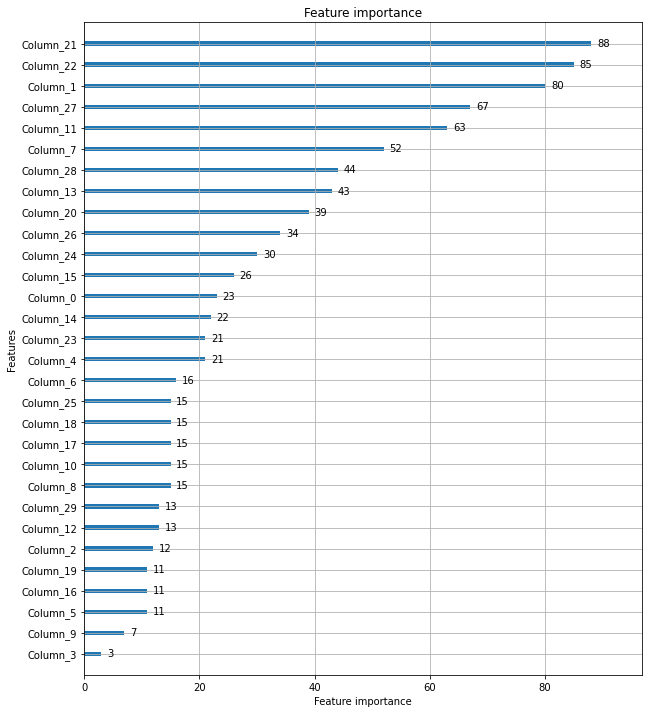

In [11]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)
# 넘파이로 피처 데이터를 학습할 경우 Column_ 뒤에 피처 순서대로 숫자를 붙여서 X축에 나열 (Column_0, Column_1, ...)

### 10 스태킹 앙상블
- 스태킹 (stacking) : 개별적인 여러 알고리즘을 서로 결합헤 예측 결과를 도출한다는 점에서 배깅 및 부스팅과 공통점을 가짐
 - 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 차이점을 가짐
 - 개별 알고리즘의 예측 결과를 데이터 세트로 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식 (메타 모델)
- 두 종류의 모델 필요 : 개별적인 기반 모델, 최종 메타 모델
- 캐글과 같은 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우 자주 사용됨
- 많은 개별 모델이 필요하며, 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용

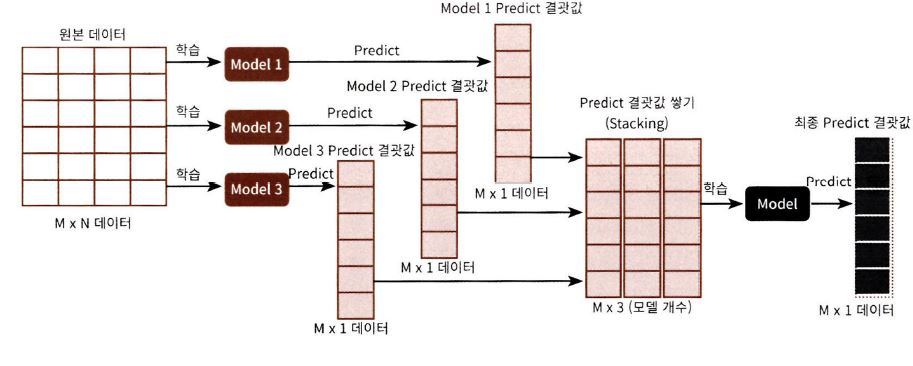
- 모델별로 M개의 로우를 가진 1개의  레이블 값 도출
- 모델별로 도출된 예측 레이블 값을 다시 합해서(스태킹) 새로운 데이터 세트를 만들고 스태킹된 데이트 세트에 대해 최종 모델을 적용

#### (1) 기본 스태킹 모델

In [28]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data=cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [29]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print("KNN 정확도: {0:.4f}".format(accuracy_score(y_test, knn_pred)))
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))
print("결정 트리 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))
print("에이다부스트 정확도: {0:.4f}".format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [30]:
# 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만듦
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [31]:
# 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용, 학습 후 예측 정확도 측정

lr_final.fit(pred, y_test)
final=lr_final.predict(pred)
print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, final)))

# 개별 모델보다 정확도 향상

최종 메타 모델의 예측 정확도: 0.9737


##### (2) CV 세트 기반의 스태킹
- 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
- 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤이를 기반으로 메타 모델이 학습과 예측을 수행
1. 스텝 1 : 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
2. 스텝 2 : 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트 생성. 각 모델이 생성한 테스트용 데이터도 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 데이터 세트 생성. 메타 모델을 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가함

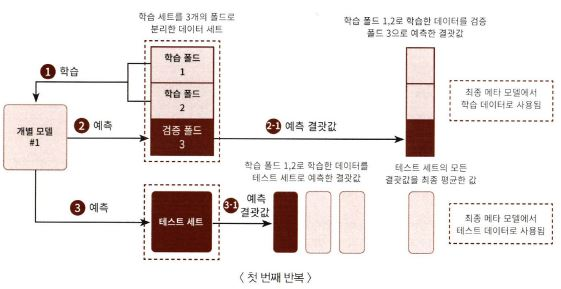

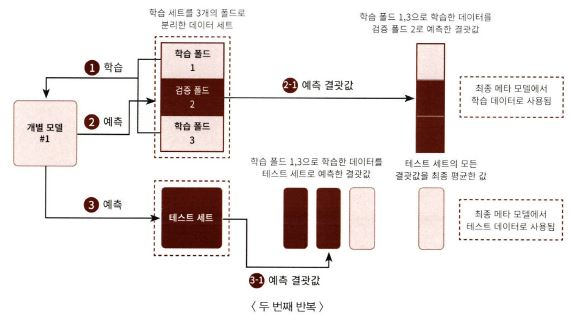

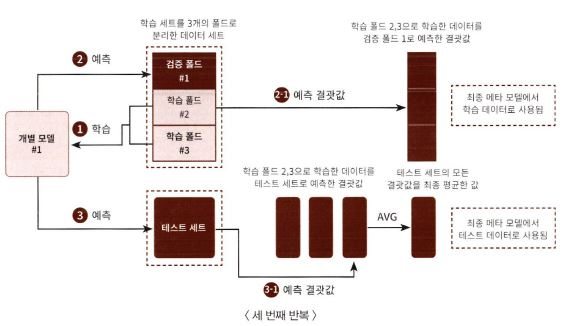

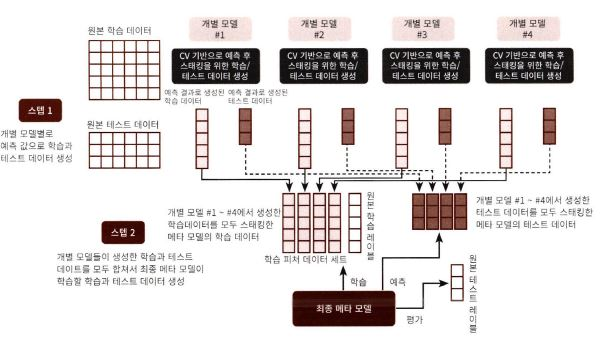

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):

    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle = True, random_state=0)

    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr , y_tr)       
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)

        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [49]:
# 여러 개의 분류 모델별로 stack_base_model() 함수 수행하여 각각 메타 모델이 추후에 사용할 학습용, 테스트용 데이터 세트 반환
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [50]:
# 스텝 2 구현, get_stacking_base_datasets() 호출로 반환된 각 모델별 학습 데이터와 테스트 데이터를 합치기

Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1) # 메타 모델이 학습할 학습용 피처 데이터 세트
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1) # 메타 모델이 예측할 테스트용 피처 데이터 세트
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [51]:
# 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습
lr_final.fit(Stack_final_X_train, y_train)
# 스태킹된 테스트 데이터 세트로 예측
stack_final = lr_final.predict(Stack_final_X_test)
# 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도 측정
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


- 예제와 달리 스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 만드는 것이 일반적

### 11 정리
- 대부분의 앙상블 기법은 결정 트리 기반으로 여러 개의 약한 학습기(Weak Learner)를 결합해 변동성을 줄여 예측 오류를 줄이고, 성능을 개선
1. 결정 트리 알고리즘
 1. 정보의 균일도에 기반하여 규칙 트리를 만들어 예측을 수행 
 2. 다른 알고리즘에 비해 비교적 직관적이어서 예측 결과가 도출되는 과정을 쉽게 알 수 있음
 3. 균일한 최종 예측 결과를 도출하기 위해 결정 트리가 깊어지고 복잡해져 과적합이 쉽게 발생한다는 단점
2. 앙상블 기법은 대표적으로 배깅과  부스팅으로 구분
 1. 배깅 방식은 학습 데이터의 중복을 허용하여 다수의 세트로 샘플링한 후, 이를 여러 개의 약한 학습기가 학습한 뒤, 최종 결과를 결합해 예측하는 방식 (ex. 랜덤 포레스트)
 2. 부스팅 방식은 학습기들이 순차적으로 학습을 진행하며 예측이 틀린 데이터에 대해 가중치를 부여한 후, 다음 번 학습기가 학습할 때는 이전에 예측이 틀린 데이터에 대해 보다 높은 정확도로 예측할 수 있게 함 (ex. GBM, XGBoost, LightBGM)
3. 스태킹은 여러 개의 개별 모델이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터셋과 예측할 테스트 데이터셋을 스태킹 형태로 결합해 재생성하는 기법